In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import time
from scipy.optimize import brute

In [8]:
#file_name = "../nhussain_scripts/InvModShiftVals/10129857-10_feats.txt"
file_list = os.listdir("../KOI_ModShiftVals_Try2//.")
file_list = [x for x in file_list if "fixed" in x]
#print len(file_list)
star_list = [x.split("_")[0] for x in file_list]
file_catalog = np.loadtxt("../../Training/simulation/primaryKOI_try2/prim_ltf.txt", dtype=str)
file_list=[x.split("_")[0]+"_prim_feats_fixed.txt" for x in file_catalog]
print file_list[0], len(file_list)
print len(np.unique(star_list))
unique_star_list = np.unique([x.split("-")[0] for x in star_list])
print len(unique_star_list)

koi_3149_list = [x.split("-")[0] for x in file_catalog]
unique_koi_list = np.unique(koi_3149_list)
print len(koi_3149_list)
print len(star_list), len(koi_3149_list), len(unique_star_list), len(unique_koi_list)
for name in unique_koi_list:
    if name not in unique_star_list:
        print name

10000941-0_prim_feats_fixed.txt 3149
3080
283
3149
3080 3149 283 289
10252364
10658499
11182787
11446961
5262779
9779480


In [3]:
print star_list[1]

10000941-1


In [19]:
#file_list = os.listdir("../../Training/simulation/primaryKOI_try2/")
print len(file_list)
data_table = np.zeros((len(star_list), 35))
for i, name in enumerate(star_list):
    try:
        data = np.loadtxt("../KOI_ModShiftVals_Try2/"+name+"_prim_feats_fixed.txt")
        data_table[i, :] = data
    except:
        print name+"_prim_feats_fixed.txt"


3149


In [20]:
file_name = '../../Training/catalogs/shortperiodbright_KOI.csv'
koi = pd.read_csv(file_name)
#print koi.columns.values
print len(np.unique(koi["kepid"])),  koi.shape
koi.head(5)

284 (392, 50)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,4966,10000941,K04146.01,Kepler-1558 b,CONFIRMED,CANDIDATE,0.999,0,0,0,...,-139.0,4.477,0.095,-0.105,0.854,0.103,-0.093,286.81937,46.911690,13.632
1,4967,10000941,K04146.02,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,...,-139.0,4.477,0.095,-0.105,0.854,0.103,-0.093,286.81937,46.911690,13.632
2,2605,10024701,K02002.01,Kepler-1046 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-130.0,4.403,0.076,-0.114,1.053,0.168,-0.104,296.75574,46.998291,13.286
3,7125,10053138,K07279.01,NaN,CANDIDATE,CANDIDATE,0.769,0,0,0,...,-72.0,4.333,0.154,-0.126,1.056,0.191,-0.173,280.71948,47.072220,13.717
4,5105,10063208,K04292.01,Kepler-1583 b,CONFIRMED,CANDIDATE,0.995,0,0,0,...,-82.0,4.514,0.032,-0.128,0.888,0.138,-0.046,286.38693,47.016628,12.897


In [21]:
star_ids = koi["kepid"].values.tolist()
star_planet_count = np.zeros(392)
for i, star_id in enumerate(star_ids):
    star_planet_count[i] = star_ids.count(star_id)
print len(np.where(star_planet_count==1)[0])

209


In [22]:
star_name = koi["kepid"]
periods = koi["koi_period"]
#data  = np.loadtxt(file_name, dtype = str, delimiter=",")#.reshape(data.shape[0], 5)
inds = np.where(koi["koi_model_snr"]==np.nan)[0]
koi["koi_model_snr"][inds]==1000.
#values = np.core.defchararray.add(data[:,0], "-")
#values = np.core.defchararray.add(values, data[:, 1])

SNR = np.zeros(len(star_list))
periods = np.zeros_like(SNR)
star_name_id = np.zeros_like(SNR)
star_segment = np.zeros_like(SNR)

#other_feats = np.empty(shape=[0,5])
#koi_lc_data = np.empty(shape=[0,lc_data.shape[0]+4])
#print "Lenght", len(file_list)


#print data.shape
start  = time.time()
# create KOI lc file with p rad, s rad,period,  duration
for i, val in enumerate(star_list):
    name = int(val.split("-")[0])
    file_name = val#(val.split("-")[0]) + "-"+(val.split("-")[1]).split("_")[0]
   
    if name in star_name.tolist():
        lc_data = np.loadtxt("../../Training/simulation/primaryKOI_try2//"+file_name+"_prim_ltf.lc")    
        location = np.where(star_name== int(name))[0]
        #planet_num = 0
        if len(location) > 1:
            planet_num = np.where(koi["koi_model_snr"][location].max() == koi["koi_model_snr"][location])[0]
            location =   np.where(star_name== int(name))[0][planet_num]
        else:
            location = np.where(star_name== int(name))[0][0]
        
        try:
            depth = ((koi["koi_prad"][location]/ koi["koi_srad"][location])/float(110))**2
            #print len(location)
       
            period = koi["koi_period"][location] #days
            periods[i] = period
            #print period
            duration = koi["koi_duration"][location] #hours
            model_snr = koi["koi_model_snr"][location]
            n_points = np.floor(duration * 2) # assuming duration is given in hours, as days does not make sense
            meidan = np.median(lc_data[:,2]) # flux
            error = np.median(np.abs(lc_data[:,2]-meidan)**2)**0.5
            n_transits = float(26)//float(period) +1
            #values = np.asarray([koi["koi_prad"][location], koi["koi_srad"][location], period, duration, name]).reshape(1,5)
            #other_feats = np.append(other_feats, values, axis = 0)

            SNR[i] = depth*np.sqrt(n_transits) * np.sqrt(n_points)/(error*np.sqrt(2))
            star_name_id[i] = val.split("-")[0]
            star_segment[i] = (val.split("-")[1]).split("_")[0]
            #if name == 9702072:
            #    print name
            #    print depth, n_transits, n_points, error, SNR[i]
        
        except:
            #print name
            continue
        #'''
        
        
       
    else:
        print "Not in list", val[:-17]#+"ltf.lc"
    if i %1000 ==999:
        print i



999
1999
2999


In [30]:
size = SNR.shape[0]
SNR_feats = np.hstack([star_name_id.reshape(size, 1), star_segment.reshape(size,1), SNR.reshape(size, 1)])
np.savetxt("../Data/SNR_feats_KOIS_3080_fixed_try2.txt", SNR_feats)
print SNR_feats.shape
np.savetxt("../Data/koi_periods_try2.txt", periods)
indices = np.where(SNR_feats[:,0]== 11017901)[0]
print indices
col_names = ["mod_sig_pri_dv", "mod_sig_sec_dv","mod_sig_ter_dv",
             "mod_sig_pos_dv", "mod_fa1_dv","mod_fa2_dv", "mod_fred_dv",
             "modshiftval1_dv", "modshiftval2_dv", "modshiftval3_dv",
             "modshiftval4_dv", "modshiftval5_dv", "modshiftval6_dv", 
             "white_noise", "red_noise", "BLS_Period_1_0", "BLS_Tc_1_0",
             "BLS_SN_1_0", "BLS_SR_1_0", "BLS_SDE_1_0", "BLS_Depth_1_0",
             "BLS_Qtran_1_0", "BLS_Qingress_1_0", "BLS_OOTmag_1_0",
             "BLS_i1_1_0", "BLS_i2_1_0", "BLS_deltaChi2_1_0", 
             "BLS_fraconenight_1_0", "BLS_Npointsintransit_1_0",
             "BLS_Ntransits_1_0", "BLS_Npointsbeforetransit_1_0", 
             "BLS_Npointsaftertransit_1_0", "BLS_Rednoise_1_0",
             "BLS_Whitenoise_1_0", "BLS_SignaltoPinknoise_1_0"]
data_table = pd.DataFrame(data_table,columns=col_names )
data_table.to_csv("../Data/KOI_feat_files_3080_fixed_ordered_try2.csv")
#print data_table[indices, :]
#print np.where(data_table==)

(3080, 3)
[352 353 354 355 356 357 358 359]


In [11]:
#plt.hist(SNR)
#put the feature files together here as well
koi_info = np.loadtxt("../Data/SNR_feats_KOIS_3080_fixed_try2.txt")


In [32]:
planet_periods = np.zeros(data_table.shape[0])
#print koi_info
#print data.shape
start  = time.time()

# create KOI lc file with p rad, s rad,period,  duration
for i, val in enumerate(star_list):
    #print KOI_data[i, 0]
    #print KOI_data[2]
    name = int(val.split("-")[0])
    #print name
    if name in star_name.tolist():
        location = np.where(star_name== name)[0]
        if len(location) > 1:
            planet_num = np.where(koi["koi_model_snr"][location].max() == koi["koi_model_snr"][location])[0]
            location =   np.where(star_name== int(name))[0][planet_num]
        else:
            location = np.where(star_name== int(name))[0][0]
        try:
            planet_periods[i] = koi["koi_period"][location] #days
            print planet_periods[i]
          
        except:
            print name
        
    else:
        print "Not in list", name#+"ltf.lc"
    if i %1000 ==999:
        print i
   


3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
3.50472344
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
14.37504582
11.7728146
11.7728146
11.7728146
11.7728146
11.7728146
11.7728146
11.7728146
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
9.3281912
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.75800092
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
12.06222962
2.131660527
2.131660527
2.131660527
2.131660527
2.131660527
2.131660527
2.131660527
2.131660527
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194
5.007414194

In [33]:
def period_func(vals, p_bls, p_inj):
    a, b = vals
    a = np.rint(a)
    b = np.rint(b)
    #print a, b
    #print a*p_bls-b*p_inj
    
    return np.abs((a*p_bls - b*p_inj) / 0.5/(a*p_bls + b*p_inj))

In [37]:
rranges=(slice(1, 5, 1), slice(1, 5, 1))
harmonics_koi = np.empty(shape = [data_table.shape[0],2])
for i in range(data_table.shape[0]):
    results = brute(period_func, ranges=rranges, args=(data_table["BLS_Period_1_0"][i], planet_periods[i]), full_output=True, finish= None)
    #print results[0]
    harmonics_koi[i, :] =results[0]
    try:
        results[0].astype(int)
    except:
        print i
    #break
print harmonics_koi.shape

(3080, 2)


3080 (3080,) (3080, 2)
1101
2370
(3080, 2) (3080,)


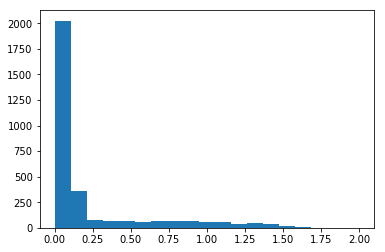

In [38]:
tol_koi = np.zeros(data_table.shape[0])
print data_table.shape[0], planet_periods.shape, harmonics_koi.shape

for i in range(data_table.shape[0]):
    a = harmonics_koi[i]
    b = data_table["BLS_Period_1_0"][i]
    c = planet_periods[i]
    tol_koi[i] = period_func( harmonics_koi[i], data_table["BLS_Period_1_0"][i], planet_periods[i])
print len(np.where(tol_koi<0.002)[0])
print len(np.unique(np.where(harmonics_koi>1)[0]))
plt.hist(tol_koi, bins = np.linspace(0,2,20))
print harmonics_koi.shape, tol_koi.shape
tot_vals_koi = np.hstack([harmonics_koi, tol_koi.reshape(harmonics_koi.shape[0], 1)]) 

In [39]:
np.savetxt("../Data/period_harmonics_3080_koi_signals_tol_5x5_ordered_try2.txt", tot_vals_koi)

#IGNORE EVERYTHING BELOW

In [51]:
print KOI_data.shape, SNR_feats.shape
indices = np.where(SNR_feats[:,0]== 11017901)[0]
print KOI_data.loc[np.where(SNR_feats[:,0]== 11017901)[0]]["white_noise"]

(3080, 35) (3080, 3)
352    0.008052
353    0.009133
354    0.007595
355    0.005871
356    0.005310
357    0.003510
358    0.009254
359    0.003705
Name: white_noise, dtype: float64


7.79552143


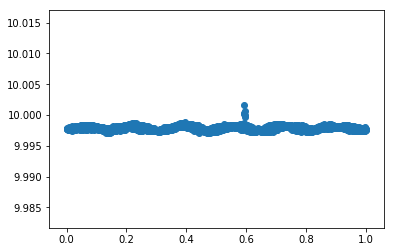

In [43]:
lc_data = np.loadtxt("../../Training/simulation/primaryKOI_try2/11017901-2_prim_ltf.lc")
bls_data = np.loadtxt("../../Training/simulation/primaryKOI_try2/11017901-2_prim_ltf.blsanal")[0,1:]
print bls_data[0]
plt.scatter(lc_data[:,0]/bls_data[0]%1, lc_data[:,2])
from scipy.special import erfcinv

In [44]:
#calculate mod shift vals for above curve, see if it compares to what is on file
#fold it in phase space
first_lc = lc_data
first_bls = bls_data

phase = ((first_lc[:,0] -first_bls[1])/first_bls[0])%1
depth = first_bls[5]
transit_duration = first_bls[6]
ingress_duration = first_bls[7]*first_bls[6]*1.5


#find white noise, and remove primary signal
white_noise = np.std(first_lc[:,1][(phase>transit_duration/2) & (phase<1-transit_duration/2)])
mean_out_transit_flux = np.mean(first_lc[:,1][(phase>transit_duration/2) & (phase<1-transit_duration/2)])
#remove in transit portion

cleaned_vals = np.empty(shape=[0,3])
#remove transit signal
slope = depth /ingress_duration


for i, vals in enumerate(first_lc):
    vals =vals.reshape(1,3)
    if phase[i] <transit_duration-ingress_duration or phase[i]>1-transit_duration+ingress_duration:
         vals[0][1] = vals[0][1]-depth
    elif ((phase[i] > transit_duration-ingress_duration  and phase[i]<transit_duration)) : 
         vals[0][1] -= (ingress_duration - phase[i]) *slope

    elif ((phase[i]>1-transit_duration) and (phase[i]<1-transit_duration+ingress_duration)):
         vals[0][1] -= (ingress_duration - (1 - phase[i])) *slope

    cleaned_vals = np.append(cleaned_vals, vals, axis = 0)



#using transit width, search through phase space to find secondary and tertiary signals
comb = zip(phase, cleaned_vals[:,1]) 
comb.sort()
phase_time, total_flux = zip(*comb)
total_flux = np.asarray(total_flux).reshape((len(total_flux),1))

mod_sig_sec_dv = 0
mod_sig_pos_dv = 0
sec_loc = 1
phase_time = np.asarray(phase_time)

cut_phase =  phase_time#[(phase_time > transit_duration) & (phase_time<(1-transit_duration))]
cut_flux = total_flux#[(phase_time > transit_duration) & (phase_time<(1-transit_duration))]

for i, vals in enumerate(cut_phase):
    section = cut_flux[(cut_phase>cut_phase[i]) & (cut_phase<cut_phase[i]+transit_duration*2)]
    depth_two = np.mean(section) - mean_out_transit_flux
    if depth_two == max( mod_sig_sec_dv, depth_two):
        sec_loc = phase_time[i]
    mod_sig_sec_dv = max(mod_sig_sec_dv, depth_two)
    mod_sig_pos_dv = min(mod_sig_pos_dv, depth_two) 




for i, vals in enumerate(cut_phase):
    if (vals< sec_loc+transit_duration) and (vals>sec_loc-transit_duration):
        cut_flux[i] -= mod_sig_sec_dv

mod_sig_ter_dv = 0
for i, vals in enumerate(cut_phase):
    section = cut_flux[(cut_phase>cut_phase[i]) & (cut_phase<cut_phase[i]+transit_duration*2)]
    sig = np.mean(section) - mean_out_transit_flux
    mod_sig_ter_dv = max(mod_sig_sec_dv, sig)

mod_sig_sec_dv = mod_sig_sec_dv - mean_out_transit_flux


#red noise
#red noise^2 = white noise /npoiint + red noise
#inverse relationship
#try with three timescales, one, two, and threee t durations
#look at portions outside of transit?
red_noise_1 = []
red_noise_2 = []
red_noise_3 = []

red_noise_1_p = []
red_noise_2_p = []
red_noise_3_p = []

for i, vals in enumerate(cut_phase[:-1]):
    section1 = cut_flux[(cut_phase>cut_phase[i]) & (cut_phase<cut_phase[i]+transit_duration)]
    section2 = cut_flux[(cut_phase>cut_phase[i]) & (cut_phase<cut_phase[i]+transit_duration*2)]
    section3 = cut_flux[(cut_phase>cut_phase[i]) & (cut_phase<cut_phase[i]+transit_duration*3)]
    red_noise_1_p.append(section1.shape[0])
    red_noise_2_p.append(section2.shape[0])
    red_noise_3_p.append(section3.shape[0])
    red_noise_1.append(np.var(section1))
    red_noise_2.append(np.var(section2))
    red_noise_3.append(np.var(section3))

N_p_1 = np.median(red_noise_1_p)
N_p_2 = np.median(red_noise_2_p)
N_p_3 = np.median(red_noise_3_p)

white_noise_2 = np.abs((np.mean(red_noise_1) - np.mean(red_noise_2))* (N_p_1 * N_p_2) / (N_p_1+N_p_2))

red_noise = np.sqrt(np.abs(np.mean(red_noise_1) - white_noise_2/N_p_1))

#from scipy.special import erfcinv

period = first_bls[0]
n_trans = first_bls[14]


mod_sig_pri_dv = depth
mod_fred_dv = red_noise / white_noise # ratio between the two
mod_fa1_dv = np.sqrt(2) * erfcinv(transit_duration/(period* n_trans))
mod_fa2_dv = np.sqrt(2) * erfcinv(transit_duration/(period))

modshiftval1_dv = mod_sig_pri_dv/mod_fred_dv - mod_fa1_dv
modshiftval2_dv = mod_sig_pri_dv - mod_sig_ter_dv-mod_fa2_dv
modshiftval3_dv = mod_sig_pri_dv - mod_sig_pos_dv - mod_fa2_dv
modshiftval4_dv = mod_sig_sec_dv / mod_fred_dv - mod_fa1_dv
modshiftval5_dv = mod_sig_sec_dv - mod_sig_ter_dv - mod_fa2_dv
modshiftval6_dv = mod_sig_sec_dv-mod_sig_pos_dv - mod_fa2_dv


vals = [mod_sig_pri_dv, mod_sig_sec_dv, mod_sig_ter_dv, mod_sig_pos_dv, mod_fa1_dv, mod_fa2_dv, mod_fred_dv, modshiftval1_dv, modshiftval2_dv, modshiftval3_dv, modshiftval4_dv, modshiftval5_dv, modshiftval6_dv, white_noise, red_noise]

total_Vals = np.concatenate([vals, first_bls])

In [68]:
print total_Vals
compare_data = np.loadtxt("../KOI_ModShiftVals_Try2/11017901-2_prim_feats_fixed.txt")
print compare_data == total_Vals
total_compare_data = pd.read_csv("../Data/KOI_feat_files_3080_fixed_ordered_try2.csv", index_col=0)
#print total_compare_data.loc[indices, :]
indices = np.where(SNR_feats[:,0]== 11017901)[0]
#print KOI_data.loc[np.where(SNR_feats[:,0]== 11017901)[0]]
print KOI_data.loc[691]
print indices
print np.where(total_compare_data==2.55000000e-03)

[  2.55000000e-03  -9.99027023e+00   7.57888340e-03  -4.44606366e-03
   3.71806289e+00   3.35174993e+00   9.78303535e-01  -3.71545634e+00
  -3.35677882e+00  -3.34475387e+00  -1.39298938e+01  -1.33495990e+01
  -1.33375741e+01   9.21291109e-03   9.01302349e-03   7.79552143e+00
   8.15362747e+02   5.83628000e+00   1.20000000e-04   4.66207000e+00
   2.55000000e-03   6.26000000e-03   2.29430000e-01   9.99789000e+00
   6.83760000e-01   6.90020000e-01  -0.00000000e+00   4.30990000e-01
   9.00000000e+00   4.00000000e+00   5.00000000e+00   1.00000000e+01
   2.80000000e-04   3.30000000e-04   1.42955100e+01]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
mod_sig_pri_dv                    0.002550
mod_sig_sec_dv                   -9.999600
mod_sig_ter_dv                    0.000405
mod_sig_pos_dv                   -0.000976
mod_fa1_d